# Classificação Binária

In [26]:
# features (1 sim, 0 não)
# pelo longo? 
# perna curta?
# faz auau?
porco1 = [0, 1, 0]
porco2 = [0, 1, 1]
porco3 = [1, 1, 0]

cachorro1 = [0, 1, 1]
cachorro2 = [1, 0, 1]
cachorro3 = [1, 1, 1]

In [27]:
train_x = [porco1, porco2, porco3, cachorro1, cachorro2, cachorro3]
train_y = [1, 1, 1, 0, 0, 0]

In [49]:
from sklearn.svm import LinearSVC
model = LinearSVC()

In [29]:
model.fit(dados, classes)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [30]:
animal_misterioso = [1,1,1]

In [31]:
model.predict([animal_misterioso])

array([0])

In [32]:
misterio1 = [1, 1, 1]
misterio2 = [1, 1, 0]
misterio3 = [0, 1, 1]

test_x = [misterio1, misterio2, misterio3]

In [33]:
predicoes = model.predict(teste)

In [34]:
test_y = [0, 1, 1]

In [35]:
from sklearn.metrics import accuracy_score

In [39]:
taxa_de_acerto = accuracy_score(test_y, predicoes)
taxa_de_acerto

0.6666666666666666

# Projeto 2

In [1]:
import pandas as pd

In [26]:
url = "https://gist.githubusercontent.com/guilhermesilveira/2d2efa37d66b6c84a722ea627a897ced/raw/10968b997d885cbded1c92938c7a9912ba41c615/tracking.csv"

In [27]:
df = pd.read_csv(url)

In [28]:
df.head()

,home,how_it_works,contact,bought
0,1,1,0,0
1,1,1,0,0
2,1,1,0,0
3,1,1,0,0
4,1,1,0,0


In [29]:
mapa_colunas = {
    'home': 'principal',
    'how_it_works': 'como_funciona',
    'contact': 'contato',
    'bought': 'comprou'
}

In [30]:
df.rename(columns=mapa_colunas, inplace True)

SyntaxError: invalid syntax (<ipython-input-30-a704bc4c7aba>, line 1)

In [ ]:
x = df[['principal', 'como_funciona', 'contato']]

In [ ]:
y = df[['comprou']]

In [31]:
x.head()

,principal,como_funciona,contato
0,1,1,0
1,1,1,0
2,1,1,0
3,1,1,0
4,1,1,0


In [32]:
y.head()

,comprou
0,0
1,0
2,0
3,0
4,0


In [33]:
from sklearn.model_selection import train_test_split

In [101]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=12, stratify=y)

**Random State** é utilizado para garantir que o algoritmo de separação não seja aleatório, mas siga uma ordem de acordo com o seed dado.

**Sratify** garante uma proporção entre os dados de teste e treino de acordo com uma variável dada

In [102]:
print(f'Shape de X de Treino {x_train.shape}')
print(f'Shape de X de Teste {x_test.shape}')
print(f'Shape de Y de Treino {y_train.shape}')
print(f'Shape de Y de Teste {y_test.shape}')

Shape de X de Treino (74, 3)
Shape de X de Teste (25, 3)
Shape de Y de Treino (74, 1)
Shape de Y de Teste (25, 1)


In [103]:
from sklearn.svm import LinearSVC

In [104]:
model = LinearSVC()

In [105]:
model.fit(x_train, y_train)

C:\Users\lucasrcs\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [106]:
y_pred = model.predict(x_test)

In [107]:
from sklearn.metrics import accuracy_score

In [108]:
accuracy_score(y_test, y_pred)

0.92

In [109]:
y_test['comprou'].value_counts()

0    17
1     8
Name: comprou, dtype: int64

In [110]:
y_train['comprou'].value_counts()

0    49
1    25
Name: comprou, dtype: int64

# Projeto 3

In [111]:
import pandas as pd

In [123]:
url = 'https://gist.githubusercontent.com/guilhermesilveira/1b7d5475863c15f484ac495bd70975cf/raw/16aff7a0aee67e7c100a2a48b676a2d2d142f646/projects.csv'
df = pd.read_csv(url)

In [124]:
df.head()

,unfinished,expected_hours,price
0,1,26,192
1,1,88,9015
2,1,89,2577
3,1,42,275
4,1,39,170


In [125]:
mapa_unfinished = {
    0: 1,
    1: 0
}

In [126]:
df['unfinished'].map(mapa_unfinished)

0       0
1       0
2       0
3       0
4       0
       ..
2152    1
2153    0
2154    1
2155    1
2156    0
Name: unfinished, Length: 2157, dtype: int64

In [127]:
mapa_colunas = {
    'unfinished': 'finalizado',
    'expected_hours': 'horas_esperadas',
    'price': 'preco'
}

In [128]:
df.rename(columns = mapa_colunas, inplace=True)

In [129]:
df.head()

,finalizado,horas_esperadas,preco
0,1,26,192
1,1,88,9015
2,1,89,2577
3,1,42,275
4,1,39,170


In [130]:
df.describe()

,finalizado,horas_esperadas,preco
count,2157.000000,2157.000000,2157.000000
mean,0.474270,50.515531,3140.696801
std,0.499453,28.589513,5079.220196
min,0.000000,1.000000,100.000000
25%,0.000000,26.000000,247.000000
50%,0.000000,51.000000,685.000000
75%,1.000000,75.000000,3668.000000
max,1.000000,100.000000,30223.000000


In [131]:
import seaborn as sns

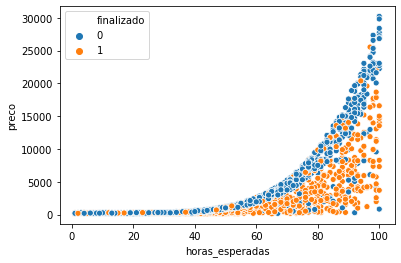

In [139]:
sns.scatterplot(x='horas_esperadas', y='preco', hue='finalizado', data=df)

In [146]:
x = df[['horas_esperadas', 'preco']]
y = df[['finalizado']]

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=22, test_size=0.2, stratify=y)

from sklearn.svm import LinearSVC
model = LinearSVC()

model.fit(x_train, y_train)

y_pred = model.predict(x_test)

from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, y_pred)
print(f'A Acurácia é de {acc}')

A Acurácia é de 0.47453703703703703


C:\Users\lucasrcs\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\lucasrcs\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
